In [1]:
import os
import pandas as pd
import numpy as np
import sys
sys.path.append('/gpfs2/projects/project-bus_capstone_2016/workspace/mu529/Bus-Capstone')
import ttools #homemade module
import gtfs #homemade module
os.chdir('/gpfs2/projects/project-bus_capstone_2016/workspace/share')
%matplotlib inline

In [2]:
# get all the schedule data. (subset can be created later)
trips = gtfs.load_trips('2015-12-03','gtfs/')
# stops = gtfs.load_stops('2015-12-03','gtfs/')
stop_times, tz_sched = gtfs.load_stop_times('2015-12-03','gtfs/')
print 'Finished loading GTFS data.'

Finished loading GTFS data.


['BPPD5-BP_D5-Saturday-10',
 'BPPD5-BP_D5-Sunday-10',
 'BPPD5-BP_D5-Weekday-10',
 'BPPD5-BP_D5-Weekday-10-SDon',
 'BPPD5-BP_S5-Weekday-20',
 'CA_D5-Saturday',
 'CA_D5-Sunday',
 'CA_D5-Weekday',
 'CA_D5-Weekday-SDon',
 'CA_E5-Saturday',
 'CA_E5-Sunday',
 'CA_E5-Weekday',
 'CA_E5-Weekday-SDon',
 'CA_S5-Weekday',
 'CH_D5-Saturday',
 'CH_D5-Sunday',
 'CH_D5-Weekday',
 'CH_D5-Weekday-SDon',
 'CH_E5-Saturday',
 'CH_E5-Sunday',
 'CH_E5-Weekday',
 'CH_E5-Weekday-SDon',
 'CH_S5-Weekday',
 'CPPD5-CP_D5-Saturday-10',
 'CPPD5-CP_D5-Sunday-10',
 'CPPD5-CP_D5-Weekday-10',
 'CPPD5-CP_D5-Weekday-10-SDon',
 'CPPD5-CP_S5-Weekday-20',
 'CS_D5-Saturday',
 'CS_D5-Sunday',
 'CS_D5-Weekday',
 'CS_D5-Weekday-SDon',
 'CS_E5-Saturday',
 'CS_E5-Sunday',
 'CS_E5-Weekday',
 'CS_E5-Weekday-SDon',
 'CS_R5-Weekday',
 'CS_S5-Weekday',
 'CS_U5-Weekday',
 'CS_W5-Weekday',
 'CS_Y6-Weekday',
 'ECPD5-EC_D5-Saturday-10',
 'ECPD5-EC_D5-Sunday-10',
 'ECPD5-EC_D5-Weekday-10',
 'ECPD5-EC_D5-Weekday-10-SDon',
 'ECPD5-EC_S5-Weekd

In [11]:
weekday_services = []
for s in list(trips.groupby('service_id').size().index):
    if 'Weekday' in s:
        weekday_services.append(s)

In [18]:
weekday_services = np.array(weekday_services)

In [21]:
weekday_services

array(['BPPD5-BP_D5-Weekday-10', 'BPPD5-BP_D5-Weekday-10-SDon',
       'BPPD5-BP_S5-Weekday-20', 'CA_D5-Weekday', 'CA_D5-Weekday-SDon',
       'CA_E5-Weekday', 'CA_E5-Weekday-SDon', 'CA_S5-Weekday',
       'CH_D5-Weekday', 'CH_D5-Weekday-SDon', 'CH_E5-Weekday',
       'CH_E5-Weekday-SDon', 'CH_S5-Weekday', 'CPPD5-CP_D5-Weekday-10',
       'CPPD5-CP_D5-Weekday-10-SDon', 'CPPD5-CP_S5-Weekday-20',
       'CS_D5-Weekday', 'CS_D5-Weekday-SDon', 'CS_E5-Weekday',
       'CS_E5-Weekday-SDon', 'CS_R5-Weekday', 'CS_S5-Weekday',
       'CS_U5-Weekday', 'CS_W5-Weekday', 'CS_Y6-Weekday',
       'ECPD5-EC_D5-Weekday-10', 'ECPD5-EC_D5-Weekday-10-SDon',
       'ECPD5-EC_S5-Weekday-20', 'EN_D5-Weekday', 'EN_D5-Weekday-SDon',
       'EN_O5-Weekday', 'EN_R5-Weekday', 'EN_S5-Weekday', 'EN_U5-Weekday',
       'EN_W5-Weekday', 'EN_Y6-Weekday', 'FB_D5-Weekday',
       'FB_D5-Weekday-SDon', 'FB_O5-Weekday', 'FB_R5-Weekday',
       'FB_S5-Weekday', 'FB_U5-Weekday', 'FB_W5-Weekday', 'FB_Y6-Weekday',
       'FP_

In [23]:
weekday_trips = []
for index, row in trips.iterrows():
    if 'Weekday' in row.service_id:
        weekday_trips.append(index)

In [25]:
weekday_trips

array(['EN_U5-Weekday-008000_B12_1', 'EN_U5-Weekday-011000_B12_1',
       'EN_U5-Weekday-016000_B12_1', ...,
       '9911857-SCPD5-SC_D5-Weekday-10-SDon',
       '9911858-SCPD5-SC_D5-Weekday-10-SDon',
       '9911859-SCPD5-SC_D5-Weekday-10-SDon'], 
      dtype='|S35')

In [ ]:
weekday_trips = np.array(weekday_trips)

In [31]:
stop_times.loc[weekday_trips]

TypeError: 

In [15]:
stop_times.head()

arrival_time departure_time  stop_sequence  \
trip_id                    stop_id                                              
EN_U5-Weekday-008000_B12_1 901471      01:20:00       01:20:00              1   
                           301386      01:21:28       01:21:28              2   
                           301387      01:22:00       01:22:00              3   
                           301388      01:22:55       01:22:55              4   
                           301389      01:23:13       01:23:13              5   

                                    pickup_type  drop_off_type  
trip_id                    stop_id                              
EN_U5-Weekday-008000_B12_1 901471             0              0  
                           301386             0              0  
                           301387             0              0  
                           301388             0              0  
                           301389             0              0

In [39]:
import time

In [45]:
stop_times.dtypes

arrival_time      object
departure_time    object
stop_sequence      int64
pickup_type        int64
drop_off_type      int64
dtype: object

In [51]:
stop_times['arrival_time'] = pd.to_timedelta(stop_times['arrival_time'])
# stop_times['departure_time'] = pd.to_timedelta(stop_times['departure_time'])

In [54]:
trip_durations = stop_times.groupby(level=(0))['arrival_time'].max()

In [56]:
trip_durations = trip_durations - stop_times.groupby(level=(0))['arrival_time'].min()

In [61]:
trip_durations.describe()

count                    395723
mean     0 days 00:46:32.805002
std      0 days 00:19:39.089253
min             0 days 00:02:00
25%             0 days 00:32:00
50%             0 days 00:44:00
75%             0 days 00:59:00
max             0 days 02:52:00
Name: arrival_time, dtype: object

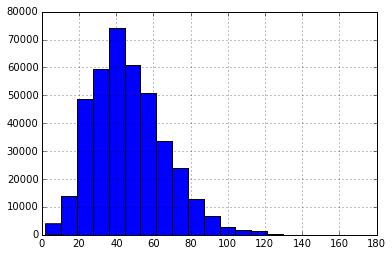

In [64]:
(trip_durations/ttools.datetime.timedelta(minutes=1)).hist(bins=20)

In [67]:
np.histogram((trip_durations/ttools.datetime.timedelta(minutes=1)),bins=20)

(array([ 3961, 13828, 48599, 59335, 74194, 60698, 50974, 33746, 24119,
        12920,  6866,  2893,  1849,  1250,   391,     6,    15,    55,
            0,    24]),
 array([   2. ,   10.5,   19. ,   27.5,   36. ,   44.5,   53. ,   61.5,
          70. ,   78.5,   87. ,   95.5,  104. ,  112.5,  121. ,  129.5,
         138. ,  146.5,  155. ,  163.5,  172. ]))